#Imports

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml

#1

Faça uma análise inicial sobre esse dataset

In [31]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({i: name for i, name in enumerate(iris.target_names)})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [32]:
print(df.info())
print('\n')
print(df.dtypes)
print('\n')
print(df.describe())
print('\n')
print(df['target'].value_counts())
print('\n')
print(iris.target_names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
species               object
dtype: object


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765

In [33]:
datadict = pd.DataFrame(df.dtypes)
datadict.columns = ['Dtype']
datadict['Valores_Nulos'] = df.isnull().sum()
datadict['%_Valores_Nulos'] = (df.isnull().sum() / df.shape[0]) * 100
datadict['NUnique'] = df.nunique()
datadict

,Dtype,Valores_Nulos,%_Valores_Nulos,NUnique
sepal length (cm),float64,0,0.0,35
sepal width (cm),float64,0,0.0,23
petal length (cm),float64,0,0.0,43
petal width (cm),float64,0,0.0,22
target,int64,0,0.0,3
species,object,0,0.0,3


#2

Use o boxplot e o histograma para caracterizar as propriedades
de cada uma das espécies existentes.

<function matplotlib.pyplot.show(close=None, block=None)>

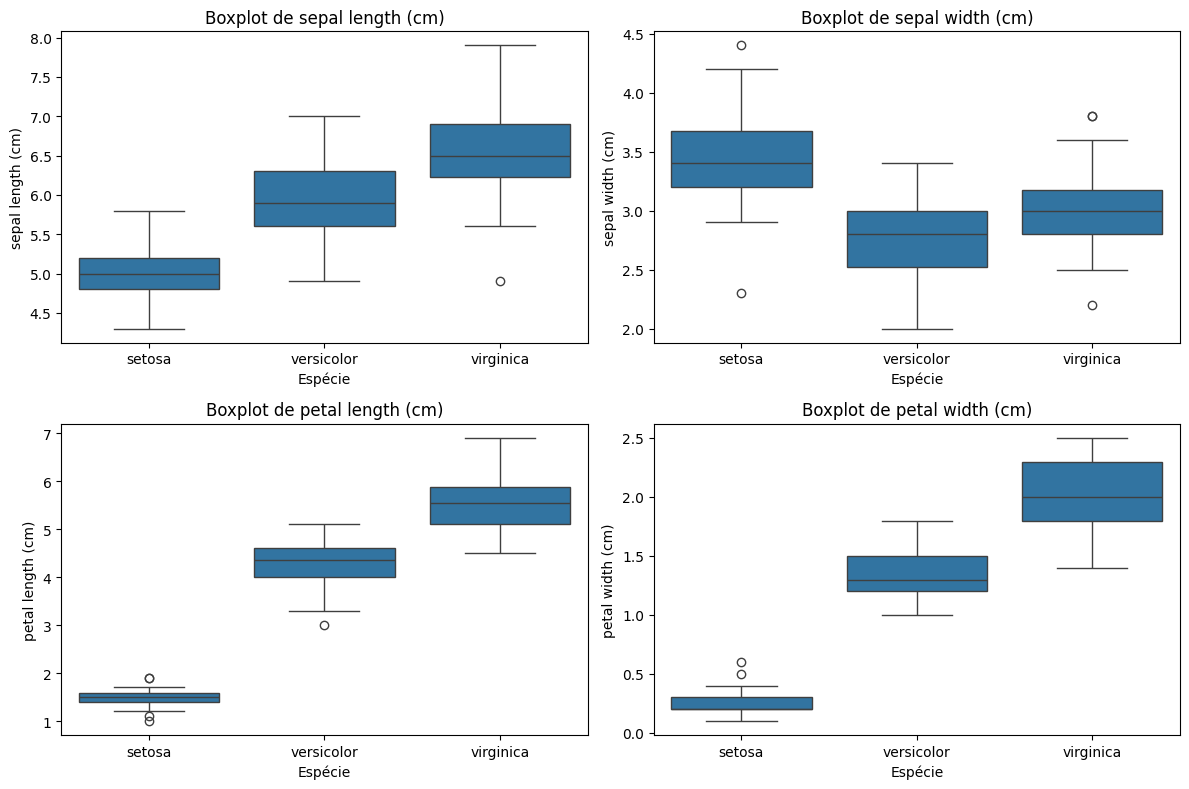

In [38]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(iris.feature_names):
  plt.subplot(2, 2, i+1)
  sns.boxplot(x='species', y=col, data=df)
  plt.title(f'Boxplot de {col}')
  plt.xlabel('Espécie')
  plt.ylabel(col)
plt.tight_layout()
plt.show

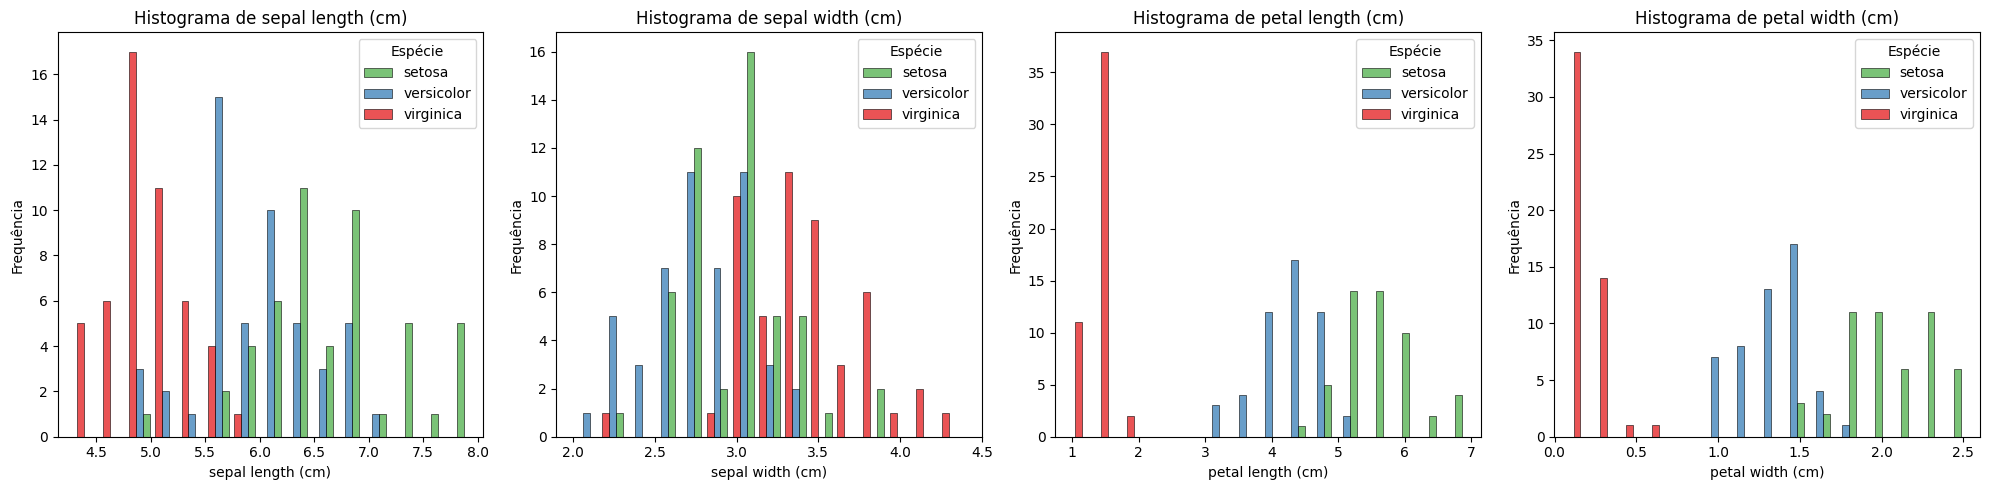

In [39]:
n = len(iris.feature_names)

fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))

for i, col in enumerate(iris.feature_names):
    sns.histplot(data=df, x=col, hue='species', kde=False, bins=15,
                 multiple='dodge', palette='Set1', shrink=0.8, ax=axes[i], legend=False)
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')
    axes[i].legend(title='Espécie', labels=df['species'].unique(), loc='upper right')

plt.tight_layout()
plt.show()

#3

Somente olhando esses gráficos, é possível afirmar que uma
ou mais propriedades (Sepal_Length, Sepal_Width,
Petal_Length, Petal_Width) são suficientes para distinguir as
espécies?

##Sim, a diferença entre as espécies e sua distribuição normal e anormal em cada gráfico é notável. Pode ser vista mesmo em um gráfico sem muitos detalhes.

#4

Aplique a regressão logística para avaliar o modelo de
classificação

In [17]:
X = df[iris.feature_names]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LogisticRegression(max_iter=200)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

#5

Calcule a acurácia, precisão e recall.

In [21]:
print('Acurácia:', accuracy_score(y_test, y_pred))
print('\nRelatório de Classificação:\n', classification_report(y_test, y_pred))
print('\nMatriz de Confusão:\n', confusion_matrix(y_test, y_pred))

Acurácia: 1.0

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Matriz de Confusão:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


#6

Plote a matriz de confusão com matplotlib ou seaborn.

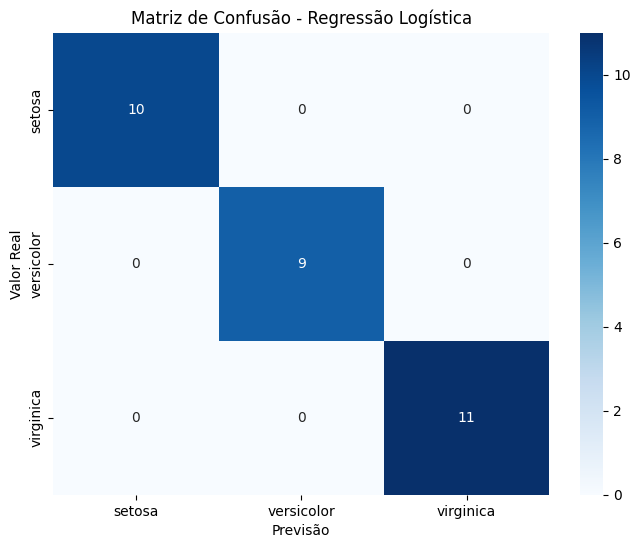

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

#7

Faça uma análise inicial sobre esse
dataset:

1. Quantos dados possui?
2. Existem dados nulos? Se sim quantos?
3. Todos são dados numéricos ou existem colunas com dados
categóricos?

In [9]:
digits = load_digits()
df_digits = pd.DataFrame(digits.data)
df_digits.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [17]:
print("Valores nulos por coluna:\n", df_digits.isnull().sum())
print("\nTotal de valores nulos:", df_digits.isnull().sum().sum())

print("\nNúmero de amostras (linhas):", digits.data.shape[0])
print("Número de features (colunas):", digits.data.shape[1])

print("\nTipos de dados:\n", df_digits.dtypes.value_counts())

Valores nulos por coluna:
 0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

Total de valores nulos: 0

Número de amostras (linhas): 1797
Número de features (colunas): 64

Tipos de dados:
 float64    64
Name: count, dtype: int64


#8

Aplique a regressão logística para construir e avaliar o modelo de
classificação.

In [19]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_digits = LogisticRegression(max_iter=10000)
modelo_digits.fit(X_train, y_train)

y_pred_digits = modelo_digits.predict(X_test)

#9

Calcule a acurácia, precisão e recall com base no desempenho do modelo.

In [21]:
print("Acurácia:", accuracy_score(y_test, y_pred_digits))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_digits))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_digits))

Acurácia: 0.975

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360


Matriz de Confusão:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0 

#10

Plote a matriz de confusão dos resultados do modelo utilizando matplotlib
ou seaborn.

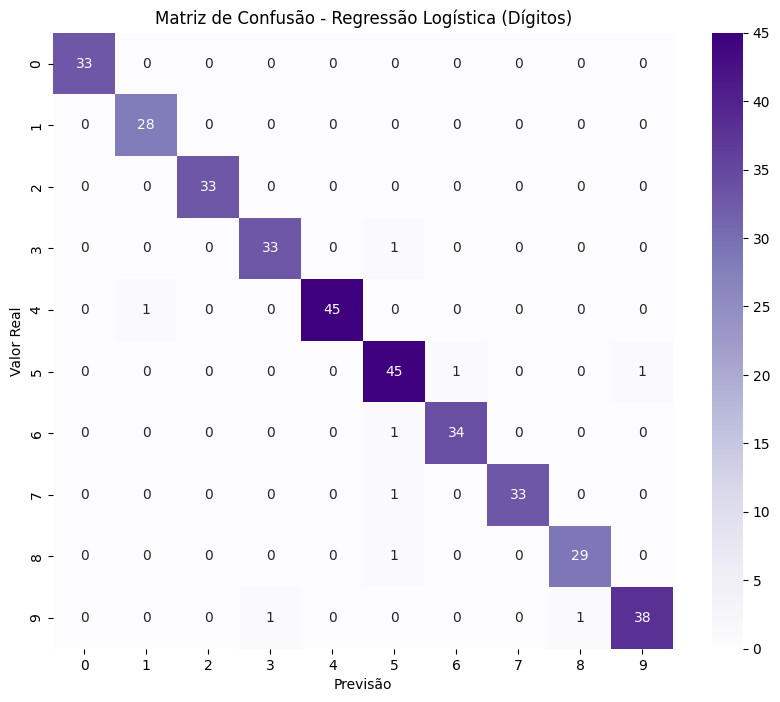

In [23]:
cm_digits = confusion_matrix(y_test, y_pred_digits)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_digits, annot=True, fmt='d', cmap='Purples',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Regressão Logística (Dígitos)')
plt.show()

#11

Aplique a regressão logística para avaliar o modelo de classificação dos
dígitos de 0 a 9 utilizando o conjunto de dados específico para esse problema
(por exemplo, MNIST).

In [27]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X = mnist.data
y = mnist.target.astype(int)

X_sample, _, y_sample, _ = train_test_split(X, y, train_size=10000, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

modelo_mnist = LogisticRegression(max_iter=1000, solver='lbfgs')
modelo_mnist.fit(X_train, y_train)

y_pred = modelo_mnist.predict(X_test)

#12

Calcule a acurácia, precisão e recall com base no desempenho do modelo
para a classificação dos dígitos de 0 a 9.

In [29]:
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.8625

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       191
           1       0.94      0.98      0.96       226
           2       0.82      0.88      0.85       215
           3       0.83      0.82      0.82       202
           4       0.92      0.84      0.88       206
           5       0.78      0.82      0.80       168
           6       0.91      0.87      0.89       196
           7       0.86      0.89      0.87       185
           8       0.82      0.76      0.79       206
           9       0.81      0.80      0.81       205

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



#13

Plote a matriz de confusão dos resultados da classificação dos dígitos de 0
a 9 utilizando matplotlib ou seaborn.

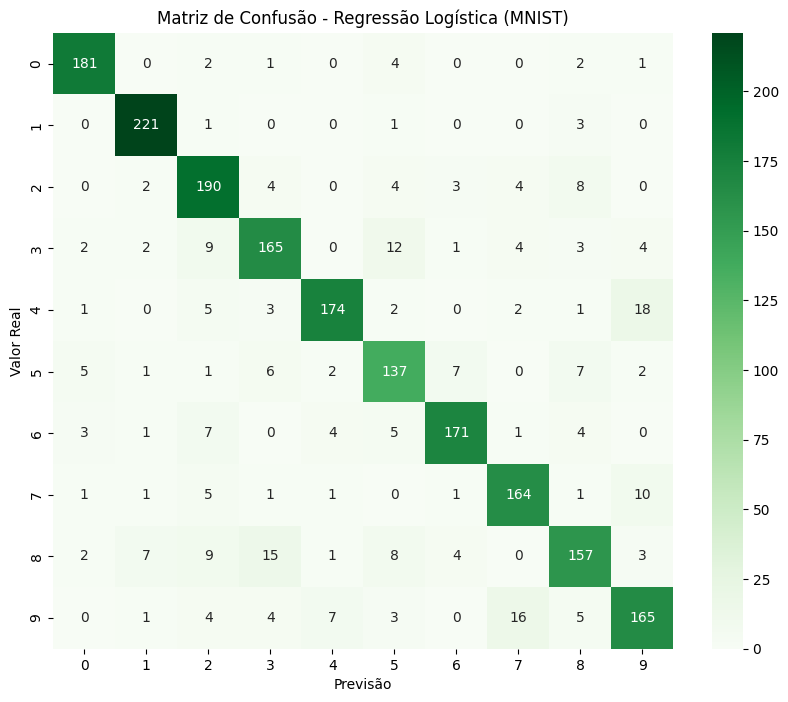

In [30]:
cm_mnist = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_mnist, annot=True, fmt='d', cmap='Greens',
            xticklabels=range(10),
            yticklabels=range(10))
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Regressão Logística (MNIST)')
plt.show()